# Lab2

## Using regression for predicting binary outcome


In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, RepeatedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

Read the data. Pay attention that data has NA values. It’s better to convert target variable to factor.

For prediction we will use only variables Sex and Age.

In [2]:
# reading the data
data = pd.read_csv('../data/donner_party.csv')

# droping useless columns and encoding Sex column
data = data[['Sex','Age', 'Survived']]
data['Sex'] = data['Sex'].map({'F':0, 'M':1})

# replacing NA values in Age column with male's median age.
# we're taking only male's median because only males have NA values in Age column
data.loc[data['Age'].isnull(),'Age'] = data[data['Sex']==1]['Age'].median()

# in sklearn's generalized linear models there is no need to cast target to categorical

In [3]:
data.head()

,Sex,Age,Survived
0,1,51.0,1
1,0,40.0,1
2,1,14.0,1
3,1,9.0,1
4,1,8.0,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex       89 non-null     int64  
 1   Age       89 non-null     float64
 2   Survived  89 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 2.2 KB


For predicting binary outcome we will use Generalized Linear Model (method = "glm") and caret package.

In [5]:
# in sklearn to perform classification with generalized linear models Logistic regression is used.

X = data.drop('Survived', axis=1)
y = data.Survived
clf = LogisticRegression()
clf.fit(X, y)
prediction_in_sample = clf.predict(X)

What is your in-sample accuracy? Build a confusion matrix

In [6]:
accuracy_score(y, prediction_in_sample)

0.6853932584269663

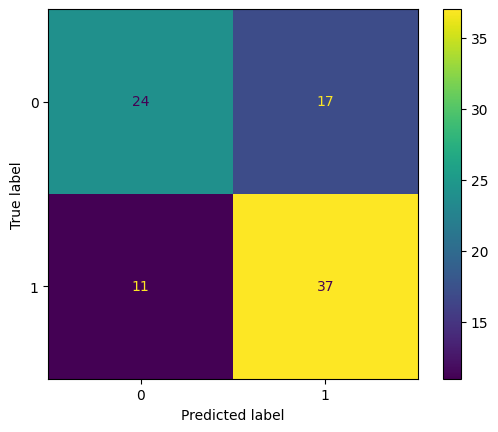

In [7]:
cm = confusion_matrix(y, prediction_in_sample, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()

plt.show()

Use a cross-validation with method = "repeatedcv", number = 5, repeats = 10. Does cross-validation improve the accuracy?

In [8]:
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)
res = cross_validate(LogisticRegression(), X, y, scoring='accuracy', cv=cv, n_jobs=-1, return_train_score=True)

print('Average in-sample accuracy score --> ', np.mean(res['train_score']))
print('Average out-of-sample accuracy score --> ', np.mean(res['test_score']))

Average in-sample accuracy score -->  0.6825978090766823
Average out-of-sample accuracy score -->  0.660718954248366


No, it did not improve the accuracy. 

In-sample accuracy stayed roughly the same as it should be. We didn't change neither the model nor the data, only evaluation technique changed.

Out-of-sample accuracy is a little bit less than in-sample one (obviously ;)) 